# Section 3.4: Influence of neuron morphology on neural entrainment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import pickle
import simnibs
import os, subprocess
import scipy
import plot_functions
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import scipy.stats as stats

In [2]:
cell_names = ['L5PC_Clone1', 'L5PC_Clone2', 'L5PC_Clone3', 'L5PC_Clone4', 'L5PC_Clone5']
dataPaths  = ['data_paper/%s_polarization_sensitivity_to_Efield_410_directions.p' % cellname for cellname in cell_names]
matrix_polarization_cells, matrix_polarization_interp_cells = [], []
for i in range(len(cell_names)):
    data_410_direction         = pickle.load(open(dataPaths[i], 'rb'))
    polarization_410_direction = np.array([item[1] for item in data_410_direction])   
    print(i, polarization_410_direction[0])

0 0.1541250996127701
1 0.07982959175054916
2 0.1252283755037773
3 0.13428725080846604
4 0.13413924684943623


In [3]:
cell_names = ['L5PC_Clone1', 'L5PC_Clone2', 'L5PC_Clone3', 'L5PC_Clone4', 'L5PC_Clone5']
dataPaths  = ['data_paper/%s_PLV_sensitivity_to_Efield_410_directions_1mVmm_10Hz.p' % cellname for cellname in cell_names]
for i in range(len(cell_names)):
    data_410_direction = pickle.load(open(dataPaths[i], 'rb'))
    plv_410_direction  = np.array([item[0] for item in data_410_direction])
    print(i, plv_410_direction[0])

0 0.035183349093201775
1 0.0237356005969444
2 0.03327364643447033
3 0.03632050897791716
4 0.03124038951823175


In [4]:
# define the 410 EF directions
list_theta = np.arange(0, 181, 10)
list_phi = np.arange(0, 360, 15)
list_410_directions = []
list_410_directions.append([list_theta[0], 0])
for i in range(1, list_theta.shape[0] - 1):
    for j in range(list_phi.shape[0]):
        list_410_directions.append([list_theta[i], list_phi[j]])
list_410_directions.append([list_theta[-1], 0])
################################
list_theta = np.arange(0, 181, 10)
list_phi   = np.arange(0, 361, 15)
list_theta = np.deg2rad(list_theta - 90)
list_phi   = np.deg2rad(list_phi - 180)
cell_names = ['L5PC_Clone1', 'L5PC_Clone2', 'L5PC_Clone3', 'L5PC_Clone4', 'L5PC_Clone5']
'''1 Load neural entrainment PLV'''
dataPaths  = ['data_paper/%s_PLV_sensitivity_to_Efield_410_directions_1mVmm_10Hz.p' % cellname for cellname in cell_names]
matrix_plv_cells, matrix_plv_interp_cells = [], []
matrix_pph_cells, matrix_pph_interp_cells = [], []
for i in range(len(cell_names)):
    data_410_direction = pickle.load(open(dataPaths[i], 'rb'))
    plv_410_direction  = np.array([item[0] for item in data_410_direction])
    pph_410_direction  = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data_410_direction])

    # Transfer 1D data to 2D data
    # plv
    matrix_plv         = np.zeros((len(list_theta), len(list_phi)))
    matrix_plv[0, :]  += plv_410_direction[0]
    num = 1
    for i in range(1, len(list_theta) - 1):
        for j in range(len(list_phi) - 1):
            matrix_plv[i, j] = plv_410_direction[num]
            num += 1
        matrix_plv[i, -1] = plv_410_direction[num - len(list_phi) + 1]
    matrix_plv[-1, :] += plv_410_direction[-1]
    matrix_plv = np.hstack((matrix_plv[:,12:-1], matrix_plv[:,0:13]))
    # Interpolate matrix plv to smooth data points
    interp_func       = scipy.interpolate.interp2d(list_phi, list_theta, matrix_plv, kind='linear')
    inter_phi         = np.linspace(list_phi[0], list_phi[-1], 360*2+1)
    interp_theta      = np.linspace(list_theta[0], list_theta[-1], 180*2+1)
    matrix_plv_interp = interp_func(inter_phi, interp_theta)
    matrix_plv_cells.append(matrix_plv)
    matrix_plv_interp_cells.append(matrix_plv_interp)
    
    # pph 
    matrix_pph = np.zeros((len(list_theta), len(list_phi)))
    matrix_pph[0, :] += pph_410_direction[0]
    num = 1
    for i in range(1, len(list_theta) - 1):
        for j in range(len(list_phi) - 1):
            matrix_pph[i, j] = pph_410_direction[num]
            num += 1
        matrix_pph[i, -1] = pph_410_direction[num - len(list_phi) + 1]
    matrix_pph[-1, :] += pph_410_direction[-1]
    matrix_pph = np.hstack((matrix_pph[:,12:-1], matrix_pph[:,0:13]))
    # Interpolate matrix pph to smooth data points
    interp_func       = scipy.interpolate.interp2d(list_phi, list_theta, matrix_pph, kind='linear')
    inter_phi         = np.linspace(list_phi[0], list_phi[-1], 360*2+1)
    interp_theta      = np.linspace(list_theta[0], list_theta[-1], 180*2+1)
    matrix_pph_interp = interp_func(inter_phi, interp_theta)
    matrix_pph_cells.append(matrix_pph)
    matrix_pph_interp_cells.append(matrix_pph_interp)
    
'''2 Load E-field normals'''
matrix_Enormal_cells, matrix_Enormal_interp_cells = [], []
for i in range(len(cell_names)):
    matrix_Enormal        = np.zeros((len(list_theta), len(list_phi)))
    matrix_Enormal[0, :] += np.cos(np.deg2rad(list_410_directions[0][0]))
    num = 1
    for i in range(1, len(list_theta) - 1):
        for j in range(len(list_phi) - 1):
            matrix_Enormal[i, j] = np.cos(np.deg2rad(list_410_directions[num][0]))
            num += 1
        matrix_Enormal[i, -1] = np.cos(np.deg2rad(list_410_directions[num - len(list_phi) + 1][0]))
    matrix_Enormal[-1, :] += np.cos(np.deg2rad(list_410_directions[-1][0]))
    matrix_Enormal = np.hstack((matrix_Enormal[:,12:-1], matrix_Enormal[:,0:13]))
    # Interpolate matrix Enormal to smooth data points
    interp_func            = scipy.interpolate.interp2d(list_phi, list_theta, matrix_Enormal, kind='linear')
    inter_phi              = np.linspace(list_phi[0], list_phi[-1], 360*2+1)
    interp_theta           = np.linspace(list_theta[0], list_theta[-1], 180*2+1)
    matrix_Enormal_interp  = interp_func(inter_phi, interp_theta)
    matrix_Enormal_cells.append(matrix_Enormal)
    matrix_Enormal_interp_cells.append(matrix_Enormal_interp)

'''3 Load somatic polarization Vm'''
dataPaths  = ['data_paper/%s_polarization_sensitivity_to_Efield_410_directions.p' % cellname for cellname in cell_names]
matrix_polarization_cells, matrix_polarization_interp_cells = [], []
for i in range(len(cell_names)):
    data_410_direction         = pickle.load(open(dataPaths[i], 'rb'))
    polarization_410_direction = np.array([item[1] for item in data_410_direction])
    # Transfer 1D data to 2D data
    matrix_polarization        = np.zeros((len(list_theta), len(list_phi)))
    matrix_polarization[0, :] += polarization_410_direction[0]
    num = 1
    for i in range(1, len(list_theta) - 1):
        for j in range(len(list_phi) - 1):
            matrix_polarization[i, j] = polarization_410_direction[num]
            num += 1
        matrix_polarization[i, -1] = polarization_410_direction[num - len(list_phi) + 1]
    matrix_polarization[-1, :] += polarization_410_direction[-1]
    matrix_polarization = np.hstack((matrix_polarization[:,12:-1], matrix_polarization[:,0:13]))
    # Interpolate matrix polarization to smooth data points
    interp_func                = scipy.interpolate.interp2d(list_phi, list_theta, matrix_polarization, kind='linear')
    inter_phi                  = np.linspace(list_phi[0], list_phi[-1], 360*2+1)
    interp_theta               = np.linspace(list_theta[0], list_theta[-1], 180*2+1)
    matrix_polarization_interp = interp_func(inter_phi, interp_theta)
    matrix_polarization_cells.append(matrix_polarization)
    matrix_polarization_interp_cells.append(matrix_polarization_interp)

'''4 load effective polarization length Lp'''
dataPaths  = ['data_paper/%s_coordinates_sectionAndSegment.npy' % cellname for cellname in cell_names]
matrix_Lp_cells, matrix_Lp_interp_cells = [], []
for i in range(len(cell_names)):
    cell_coords = np.load(dataPaths[i], allow_pickle=True).item()
    segment_startAndEnd = np.vstack((cell_coords['segment_coords']['cell_segment_coordinates_start'], \
                                     cell_coords['segment_coords']['cell_segment_coordinates_end']))
    effective_polarization_length_410_directions = np.array([plot_functions.calc_cell_effective_polarization_length_at_given_direction(segment_startAndEnd, \
                                     list_410_directions[i][0], list_410_directions[i][1], angle='degree') for i in range(len(list_410_directions))])
    matrix_Lp        = np.zeros((len(list_theta), len(list_phi)))
    matrix_Lp[0, :] += effective_polarization_length_410_directions[0]
    num = 1
    for i in range(1, len(list_theta) - 1):
        for j in range(len(list_phi) - 1):
            matrix_Lp[i, j] = effective_polarization_length_410_directions[num]
            num += 1
        matrix_Lp[i, -1] = effective_polarization_length_410_directions[num - len(list_phi) + 1]
    matrix_Lp[-1, :] += effective_polarization_length_410_directions[-1]
    matrix_Lp = np.hstack((matrix_Lp[:,12:-1], matrix_Lp[:,0:13]))
    # Interpolate Lp to smooth data points
    interp_func       = scipy.interpolate.interp2d(list_phi, list_theta, matrix_Lp, kind='linear')
    inter_phi         = np.linspace(list_phi[0], list_phi[-1], 360*2+1)
    interp_theta      = np.linspace(list_theta[0], list_theta[-1], 180*2+1)
    matrix_Lp_interp  = interp_func(inter_phi, interp_theta)
    matrix_Lp_cells.append(matrix_Lp)
    matrix_Lp_interp_cells.append(matrix_Lp_interp)

color_names = ['Oranges', 'Spectral_r', 'Blues', 'viridis']
list_matrix_interps = matrix_plv_interp_cells + matrix_Enormal_interp_cells + matrix_polarization_interp_cells + matrix_Lp_interp_cells
list_cbar_labels = ['PLV (norm.)', '$E_{\mathrm{n}}$ (norm.)', '$\Delta V_{\mathrm{m}}$ (norm.)', '$L_{\mathrm{d}}$ (norm.)']

In [5]:
'''correlation between PLV and normal component En'''
list_R2_plv_En = []
for k in range(len(cell_names)):
    matrix_plv           = matrix_plv_cells[k]
    value_min, value_max = matrix_plv.min(), matrix_plv.max()
    matrix_plv_norm      = np.zeros_like(matrix_plv)
    for i in range(matrix_plv.shape[0]):
        for j in range(matrix_plv.shape[1]):
            matrix_plv_norm[i, j] = (matrix_plv[i, j] - value_min) / (value_max - value_min)
    
    matrix_data          = matrix_Enormal_cells[k]
    value_min, value_max = matrix_data.min(), matrix_data.max()
    matrix_data_norm     = np.zeros_like(matrix_data)
    for i in range(matrix_data.shape[0]):
        for j in range(matrix_data.shape[1]):
            matrix_data_norm[i, j] = (matrix_data[i, j] - value_min) / (value_max - value_min)
    xUpward, xDownward   = matrix_data_norm[:10].flatten(), matrix_data_norm[9:].flatten()
    yUpward, yDownward   = matrix_plv_norm[:10].flatten(), matrix_plv_norm[9:].flatten()
    xDownward, yDownward = xDownward, -yDownward
    # linear regression upward
    x, y = xUpward, yUpward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_upward = np.linspace(0, 1.05, 2000)
    yfit_upward = slope * xfit_upward + intercept
    R2_upward   = r_value ** 2
    # print(f"  upward E-field: R2={R2_upward}, pvalue={p_value}")
    # linear regression downward
    x, y = xDownward, yDownward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_downward = np.linspace(-1.05, 0, 2000)
    yfit_downward = slope * xfit_downward + intercept
    R2_downward   = r_value ** 2
    # print(f"downward E-field: R2={R2_downward}, pvalue={p_value}")
    list_R2_plv_En.append([R2_upward, R2_downward])

'''correlation between PLV and polarization Vm''' 
list_R2_plv_Vm = []
for k in range(len(cell_names)):
    matrix_plv           = matrix_plv_cells[k]
    value_min, value_max = matrix_plv.min(), matrix_plv.max()
    matrix_plv_norm      = np.zeros_like(matrix_plv)
    for i in range(matrix_plv.shape[0]):
        for j in range(matrix_plv.shape[1]):
            matrix_plv_norm[i, j] = (matrix_plv[i, j] - value_min) / (value_max - value_min)
    
    matrix_data          = matrix_polarization_cells[k]
    value_min, value_max = matrix_data.min(), matrix_data.max()
    matrix_data_norm     = np.zeros_like(matrix_data)
    for i in range(matrix_data.shape[0]):
        for j in range(matrix_data.shape[1]):
            matrix_data_norm[i, j] = (matrix_data[i, j] - value_min) / (value_max - value_min)
    xUpward, xDownward   = matrix_data_norm[:10].flatten(), matrix_data_norm[9:].flatten()
    yUpward, yDownward   = matrix_plv_norm[:10].flatten(), matrix_plv_norm[9:].flatten()
    xDownward, yDownward = xDownward, -yDownward
    # linear regression upward
    x, y = xUpward, yUpward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_upward = np.linspace(0, 1.05, 2000)
    yfit_upward = slope * xfit_upward + intercept
    R2_upward   = r_value ** 2
    # print(f"  upward E-field: R2={R2_upward}, pvalue={p_value}")
    # linear regression downward
    x, y = xDownward, yDownward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_downward = np.linspace(-1.05, 0, 2000)
    yfit_downward = slope * xfit_downward + intercept
    R2_downward   = r_value ** 2
    # print(f"downward E-field: R2={R2_downward}, pvalue={p_value}")
    list_R2_plv_Vm.append([R2_upward, R2_downward])

'''correlation between PLV and effective length Lp'''
list_R2_plv_Lp = []
for k in range(len(cell_names)):
    matrix_plv           = matrix_plv_cells[k]
    value_min, value_max = matrix_plv.min(), matrix_plv.max()
    matrix_plv_norm      = np.zeros_like(matrix_plv)
    for i in range(matrix_plv.shape[0]):
        for j in range(matrix_plv.shape[1]):
            matrix_plv_norm[i, j] = (matrix_plv[i, j] - value_min) / (value_max - value_min)
    
    matrix_data          = matrix_Lp_cells[k]
    value_min, value_max = matrix_data.min(), matrix_data.max()
    matrix_data_norm     = np.zeros_like(matrix_data)
    for i in range(matrix_data.shape[0]):
        for j in range(matrix_data.shape[1]):
            matrix_data_norm[i, j] = (matrix_data[i, j] - value_min) / (value_max - value_min)
    xUpward, xDownward   = matrix_data_norm[:10].flatten(), matrix_data_norm[9:].flatten()
    yUpward, yDownward   = matrix_plv_norm[:10].flatten(), matrix_plv_norm[9:].flatten()
    xDownward, yDownward = xDownward, -yDownward
    # linear regression upward
    x, y = xUpward, yUpward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_upward = np.linspace(0, 1.05, 2000)
    yfit_upward = slope * xfit_upward + intercept
    R2_upward   = r_value ** 2
    # print(f"  upward E-field: R2={R2_upward}, pvalue={p_value}")
    # linear regression downward
    x, y = xDownward, yDownward
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    xfit_downward = np.linspace(-1.05, 0, 2000)
    yfit_downward = slope * xfit_downward + intercept
    R2_downward   = r_value ** 2
    # print(f"downward E-field: R2={R2_downward}, pvalue={p_value}")
    list_R2_plv_Lp.append([R2_upward, R2_downward])


'''five clones'''
plv_upward_5Clones, plv_downward_5Clones                   = np.empty(0), np.empty(0)
Enormal_upward_5Clones, Enormal_downward_5Clones           = np.empty(0), np.empty(0)
polarization_upward_5Clones, polarization_downward_5Clones = np.empty(0), np.empty(0)
Lp_upward_5Clones, Lp_downward_5Clones                     = np.empty(0), np.empty(0)
for k in range(len(cell_names)):
    # plv of five clones
    matrix_plv           = matrix_plv_cells[k]
    Upward, Downward     = matrix_plv[:10].flatten(), matrix_plv[9:].flatten()
    plv_upward_5Clones   = np.hstack((plv_upward_5Clones, Upward))
    plv_downward_5Clones = np.hstack((plv_downward_5Clones, Downward))
    # En of five clones
    matrix_Enormal           = matrix_Enormal_cells[k]
    Upward, Downward         = matrix_Enormal[:10].flatten(), matrix_Enormal[9:].flatten()
    Enormal_upward_5Clones   = np.hstack((Enormal_upward_5Clones, Upward))
    Enormal_downward_5Clones = np.hstack((Enormal_downward_5Clones, Downward))  
    # Vm of five clones
    matrix_polarization           = matrix_polarization_cells[k]
    Upward, Downward              = matrix_polarization[:10].flatten(), matrix_polarization[9:].flatten()
    polarization_upward_5Clones   = np.hstack((polarization_upward_5Clones, Upward))
    polarization_downward_5Clones = np.hstack((polarization_downward_5Clones, Downward))  
    # Vm of five clones
    matrix_Lp           = matrix_Lp_cells[k]
    Upward, Downward    = matrix_Lp[:10].flatten(), matrix_Lp[9:].flatten()
    Lp_upward_5Clones   = np.hstack((Lp_upward_5Clones, Upward))
    Lp_downward_5Clones = np.hstack((Lp_downward_5Clones, Downward))  
'''normlization'''
# plv norm
value_min, value_max = min(plv_upward_5Clones.min(), plv_downward_5Clones.min()), max(plv_upward_5Clones.max(), plv_downward_5Clones.max())
plv_upward_5Clones_norm, plv_downward_5Clones_norm = np.zeros_like(plv_upward_5Clones), np.zeros_like(plv_downward_5Clones)
for i in range(plv_upward_5Clones.shape[0]):
        plv_upward_5Clones_norm[i] = (plv_upward_5Clones[i] - value_min) / (value_max - value_min)
for i in range(plv_downward_5Clones.shape[0]):
        plv_downward_5Clones_norm[i] = (plv_downward_5Clones[i] - value_min) / (value_max - value_min)
# En normal
value_min, value_max = min(Enormal_upward_5Clones.min(), Enormal_downward_5Clones.min()), max(Enormal_upward_5Clones.max(), Enormal_downward_5Clones.max())
Enormal_upward_5Clones_norm, Enormal_downward_5Clones_norm = np.zeros_like(Enormal_upward_5Clones), np.zeros_like(Enormal_downward_5Clones)
for i in range(Enormal_upward_5Clones.shape[0]):
        Enormal_upward_5Clones_norm[i] = ((Enormal_upward_5Clones[i] - value_min) / (value_max - value_min) - 0.5)*2
for i in range(Enormal_downward_5Clones.shape[0]):
        Enormal_downward_5Clones_norm[i] = ((Enormal_downward_5Clones[i] - value_min) / (value_max - value_min) - 0.5)*2
# Vm norm
value_min, value_max = min(polarization_upward_5Clones.min(), polarization_downward_5Clones.min()), max(polarization_upward_5Clones.max(), polarization_downward_5Clones.max())
polarization_upward_5Clones_norm, polarization_downward_5Clones_norm = np.zeros_like(polarization_upward_5Clones), np.zeros_like(polarization_downward_5Clones)
for i in range(polarization_upward_5Clones.shape[0]):
        polarization_upward_5Clones_norm[i] = (polarization_upward_5Clones[i] - value_min) / (value_max - value_min)
for i in range(polarization_downward_5Clones.shape[0]):
        polarization_downward_5Clones_norm[i] = (polarization_downward_5Clones[i] - value_min) / (value_max - value_min)
# Lp norm
value_min, value_max = min(Lp_upward_5Clones.min(), Lp_downward_5Clones.min()), max(Lp_upward_5Clones.max(), Lp_downward_5Clones.max())
Lp_upward_5Clones_norm, Lp_downward_5Clones_norm = np.zeros_like(Lp_upward_5Clones), np.zeros_like(Lp_downward_5Clones)
for i in range(Lp_upward_5Clones.shape[0]):
        Lp_upward_5Clones_norm[i] = (Lp_upward_5Clones[i] - value_min) / (value_max - value_min)
for i in range(Lp_downward_5Clones.shape[0]):
        Lp_downward_5Clones_norm[i] = (Lp_downward_5Clones[i] - value_min) / (value_max - value_min)

'''compute the R2'''
list_R2_five_clones = []
_, _,   r_value_up, _, _ = stats.linregress(Enormal_upward_5Clones_norm, plv_upward_5Clones_norm)
_, _, r_value_down, _, _ = stats.linregress(Enormal_downward_5Clones_norm, -plv_downward_5Clones_norm)
list_R2_five_clones.append([r_value_up**2, r_value_down**2])
_, _,   r_value_up, _, _ = stats.linregress(polarization_upward_5Clones_norm, plv_upward_5Clones_norm)
_, _, r_value_down, _, _ = stats.linregress(-polarization_downward_5Clones_norm, -plv_downward_5Clones_norm)
list_R2_five_clones.append([r_value_up**2, r_value_down**2])
_, _,   r_value_up, _, _ = stats.linregress(Lp_upward_5Clones_norm, plv_upward_5Clones_norm)
_, _, r_value_down, _, _ = stats.linregress(-Lp_downward_5Clones_norm, -plv_downward_5Clones_norm)
list_R2_five_clones.append([r_value_up**2, r_value_down**2])
# print(list_R2_five_clones)

In [6]:
for i in range(5):
    print(matrix_Lp_cells[i].max())

2415.130218816837
1529.723304977999
2338.0078788997835
1803.6100584696942
2405.8447216596087


# Figure 6(b): PLV-direction maps for 4 clones

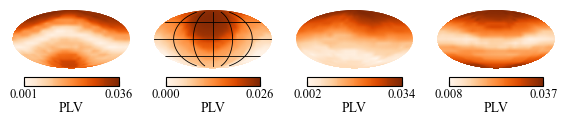

In [4]:
list_plv_min_max = []
for item in matrix_plv_cells:
    min_value = np.round(np.floor(item.min()*1e3)*1e-3, decimals=3)
    max_value = np.round(np.ceil(item.max()*1e3)*1e-3, decimals=3)
    list_plv_min_max.append([min_value, max_value])
    
fig = plt.figure(figsize=(7, 2))
for i, clone in enumerate([0, 1, 2, 4]):
    value_min, value_max = list_plv_min_max[i]
    plot_matrix = matrix_plv_interp_cells[i]
    ax = fig.add_subplot(1, 4, i+1, projection="mollweide")
    norm = matplotlib.colors.Normalize(vmin=value_min, vmax=value_max)
    ax.pcolormesh(inter_phi, interp_theta, np.flip(plot_matrix, axis=0), shading='auto', cmap='Oranges', norm=norm)
    cmap     = plt.get_cmap('Oranges', lut=100)
    mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    mappable.set_array([])
    ax.axis('off')
    cbar = fig.colorbar(mappable, cax=ax.inset_axes([0.1, -0.3, 0.8, 0.15]), location='bottom', orientation='horizontal')
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['%.3f' % value_min, '%.3f' % value_max], fontdict={'family': 'times new roman', 'fontsize': 9})
    cbar.ax.tick_params(direction='in', pad=2, labelfontfamily='times new roman', labelsize=9)
    cbar.ax.set_xlabel('PLV', fontdict={'family': 'times new roman', 'fontsize': 10}, labelpad=0)
    if clone == 1:
        lw, color, zorder = 0.6, 'k', 1
        ax.axhline(np.radians( -45), color=color, lw=lw, zorder=zorder)
        ax.axhline(np.radians(   0), color=color, lw=lw, zorder=zorder)
        ax.axhline(np.radians(  45), color=color, lw=lw, zorder=zorder)
        ax.axvline(np.radians(-120), color=color, lw=lw, zorder=zorder)
        ax.axvline(np.radians( -60), color=color, lw=lw, zorder=zorder)
        ax.axvline(np.radians(   0), color=color, lw=lw, zorder=zorder)
        ax.axvline(np.radians(  60), color=color, lw=lw, zorder=zorder)
        ax.axvline(np.radians( 120), color=color, lw=lw, zorder=zorder)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure8-1.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure 6(c): PPh-direction maps for 4 clones

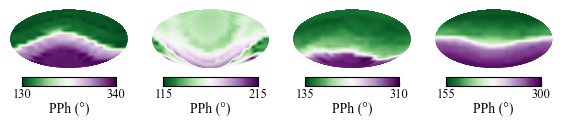

In [5]:
list_pph_min_max = [[130, 340], [115, 215], [135, 310], [155, 300], [0, 145]]
fig = plt.figure(figsize=(7, 2))
for i, clone in enumerate([0, 1, 2, 4]):
    plot_matrix = matrix_pph_interp_cells[i]
    value_min, value_max = list_pph_min_max[i]
    ax = fig.add_subplot(1, 4, i+1, projection="mollweide")
    norm = matplotlib.colors.Normalize(vmin=value_min, vmax=value_max)
    ax.pcolormesh(inter_phi, interp_theta, np.flip(plot_matrix, axis=0), shading='auto', cmap='PRGn_r', norm=norm)
    cmap     = plt.get_cmap('PRGn_r', lut=100)
    mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    mappable.set_array([])
    ax.axis('off')
    cbar = fig.colorbar(mappable, cax=ax.inset_axes([0.1, -0.3, 0.8, 0.15]), location='bottom', orientation='horizontal')
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['%d' % value_min, '%d' % value_max], fontdict={'family': 'times new roman', 'fontsize': 9})
    cbar.ax.tick_params(direction='in', pad=2, labelfontfamily='times new roman', labelsize=9)
    cbar.ax.set_xlabel('PPh (°)', fontdict={'family': 'times new roman', 'fontsize': 10}, labelpad=0)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure8-2.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure 7: Correlation between PLV and En, Vm, or Ld

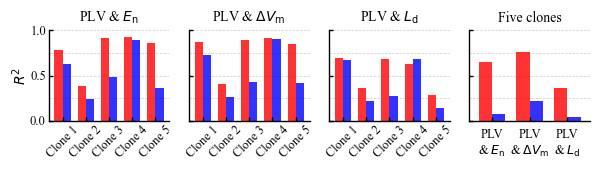

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(6.1, 1.8))
axi   = ax[0]
width = 0.35
color_up, color_down = 'r', 'b'
alpha = 0.8
axi.bar((np.array([0, 1, 2, 3, 4])-width/2).tolist(), [item[0] for item in list_R2_plv_En], width=width, color=color_up, alpha=alpha, zorder=1)
axi.bar((np.array([0, 1, 2, 3, 4])+width/2).tolist(), [item[1] for item in list_R2_plv_En], width=width, color=color_down, alpha=alpha, zorder=1)

axi = ax[1]
axi.bar((np.array([0, 1, 2, 3, 4])-width/2).tolist(), [item[0] for item in list_R2_plv_Vm], width=width, color=color_up, alpha=alpha, zorder=1)
axi.bar((np.array([0, 1, 2, 3, 4])+width/2).tolist(), [item[1] for item in list_R2_plv_Vm], width=width, color=color_down, alpha=alpha, zorder=1)

axi = ax[2]
axi.bar((np.array([0, 1, 2, 3, 4])-width/2).tolist(), [item[0] for item in list_R2_plv_Lp], width=width, color=color_up, alpha=alpha, zorder=1)
axi.bar((np.array([0, 1, 2, 3, 4])+width/2).tolist(), [item[1] for item in list_R2_plv_Lp], width=width, color=color_down, alpha=alpha, zorder=1)

axi = ax[3]
axi.bar((np.array([0, 1, 2])-width/2).tolist(), [item[0] for item in list_R2_five_clones], width=width, color=color_up, alpha=alpha, zorder=1)
axi.bar((np.array([0, 1, 2])+width/2).tolist(), [item[1] for item in list_R2_five_clones], width=width, color=color_down, alpha=alpha, zorder=1)

for item in [ax[0], ax[1], ax[2],]:
    item.set_xlim(-0.6, 4.6)
    item.tick_params(axis='x', pad=2, direction='in', labelsize=9, width=1, length=3, labelfontfamily='times new roman')
    item.set_xticks(np.arange(0, 5))
    item.set_xticklabels(['Clone 1', 'Clone 2', 'Clone 3', 'Clone 4', 'Clone 5'], fontfamily='times new roman', fontsize=9, rotation=45)

for item in [ax[3],]:
    item.set_xlim(-0.6, 2.6)
    item.tick_params(axis='x', pad=6, direction='in', labelsize=9, width=1, length=3, labelfontfamily='times new roman')
    item.set_xticks(np.arange(0, 3))
    item.set_xticklabels(["PLV\n& $E_{\mathrm{n}}$", "PLV\n& $\Delta V_{\mathrm{m}}$", "PLV\n& $L_{\mathrm{d}}$"], fontfamily='times new roman', fontsize=9, rotation=0)

for i, item in enumerate(ax):
    item.set_ylim(0, 1)
    item.set_yticks([0, 0.5, 1])
    item.spines['right'].set_color('none')
    item.spines['top'].set_color('none')
    item.spines['bottom'].set_linewidth(1)
    item.spines['left'].set_linewidth(1)
    item.tick_params(axis='y', pad=2, direction='in', labelsize=9, width=1, length=3, labelfontfamily='times new roman')
    if i > 0:
        item.set_yticklabels([])
    if i == 0:
        item.set_ylabel('$R^2$', fontsize=10, fontfamily='times new roman', labelpad=1)
    for x in [0.25, 0.5, 0.75, 1]:
        item.axhline(x, color='gray', lw=0.5, ls='--', zorder=-10, alpha=0.4)
        
ax[0].set_title("PLV & $E_{\mathrm{n}}$", fontsize=10, family='times new roman')
ax[1].set_title("PLV & $\Delta V_{\mathrm{m}}$", fontsize=10, family='times new roman')
ax[2].set_title("PLV & $L_{\mathrm{d}}$", fontsize=10, family='times new roman')
ax[3].set_title("Five clones", fontsize=10, family='times new roman')
plt.tight_layout(w_pad=0.5, h_pad=0)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure8-3.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure S8: Normalized PLV-, En-, Vm-, Ld-direction maps for 5 clones

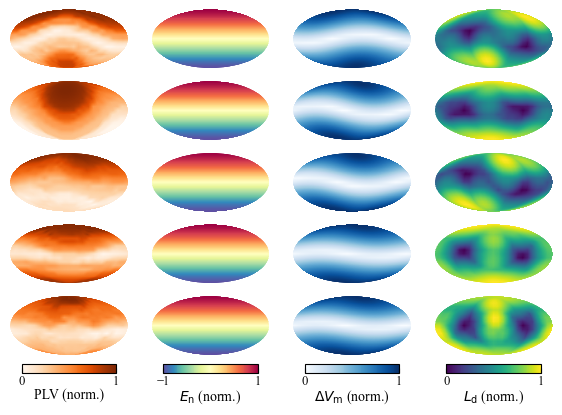

In [5]:
fig = plt.figure(figsize=(7, 4.5))
for i in range(len(cell_names)):
    for j in range(4):
        plot_matrix = list_matrix_interps[i+len(cell_names)*j]
        ax = fig.add_subplot(len(cell_names), 4, i*4+j+1, projection="mollweide")
        norm = matplotlib.colors.Normalize(vmin=plot_matrix.min(), vmax=plot_matrix.max())
        ax.pcolormesh(inter_phi, interp_theta, np.flip(plot_matrix, axis=0), shading='auto', cmap=color_names[j], norm=norm)
        cmap     = plt.get_cmap(color_names[j], lut=100)
        if j == 1:
            mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
        else:
            mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
        mappable.set_array([])
        ax.axis('off')
        if i == len(cell_names) - 1:
            cbar = fig.colorbar(mappable, cax=ax.inset_axes([0.1, -0.3, 0.8, 0.15]), location='bottom', orientation='horizontal')
            if j == 1:
                cbar.set_ticks([-1, 1])
            else:
                cbar.set_ticks([0, 1])
            cbar.ax.tick_params(direction='in', pad=2, labelfontfamily='times new roman', labelsize=9)
            cbar.ax.set_xlabel(list_cbar_labels[j], fontdict={'family': 'times new roman', 'fontsize': 10}, labelpad=0)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figureS7-1.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')